Copyright (c) 2023, Troy Phat Tran (Mr. Troy).

Binary (2-classes) image classification dataset: apple-banana.<br>
Direct link:<br>
http://dl.dropboxusercontent.com/scl/fi/mw43x41744wfykvm8fljx/apple-banana.zip?rlkey=ghmo9zf2rpza2uq9xbf7jpe3e&dl=0<br>
(~7.6 Megabytes)<br>
Backup direct link: https://trientran.github.io/tf-practice-exams/apple-banana.zip

This dataset comprises 2 classes namely Apple and Banana, and it has been split into training and validation sets.<br>
Create a classifier for the given dataset. The required input shape must be 100x100x3 (RGB images).

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

In [1]:
import os
import zipfile
from urllib.request import urlretrieve

In [20]:
from keras import Sequential
from keras.models import load_model
from keras.utils import image_dataset_from_directory
from tensorflow import cast, float32
from tensorflow.python.data import AUTOTUNE
import tensorflow as tf
from matplotlib import pyplot as plt

A function to rescale/normalize images

In [7]:
def rescale(image, label):
    image = cast(image, float32) / 255.0
    return image, label

In [27]:
def binary_model():
    # Define a data folder to extract our compressed dataset to
    data_folder = 'apple-banana/'

    # Download and extract the dataset if not existing
    if not os.path.exists(data_folder):
        dataset_url = 'http://dl.dropboxusercontent.com/scl/fi/mw43x41744wfykvm8fljx/apple-banana.zip?rlkey=ghmo9zf2rpza2uq9xbf7jpe3e&dl=0'
        local_zip = 'apple-banana.zip'
        urlretrieve(url=dataset_url, filename=local_zip)
        zip_ref = zipfile.ZipFile(file=local_zip, mode='r')
        zip_ref.extractall(data_folder)
        zip_ref.close()

    # Define image size and batch size
    img_size = (100, 100)  # ADD CODE HERE: just update the image size here to match the requirement
    batch_size = 32

    # Create the training dataset
    # The dataset is already split into training and validation sets
    train_ds = image_dataset_from_directory(
        directory="apple-banana/train/",
        seed=1,
        image_size=img_size,
        batch_size=batch_size
    )

    # Create the validation dataset
    val_ds = image_dataset_from_directory(
        directory="apple-banana/validation/",
        seed=1,
        image_size=img_size,
        batch_size=batch_size
    )

    # Rescale images (option 1)
    train_ds = train_ds.map(rescale, num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(rescale, num_parallel_calls=AUTOTUNE)

    # Configure the dataset for performance
    # https://www.tensorflow.org/tutorials/images/classification
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    # Define the model architecture
    model = Sequential([
        # Rescaling(1. / 255, input_shape=(img_size[0], img_size[1], 3)),  # Rescale images (option 2)
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,100, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0,5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the early stopping callback for val_accuracy
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.01, verbose=1)

    # Show the model architecture (optional)
    summarize_model(model)

    # Train the model with early stopping callback
    history =  model.fit(x=train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stopping])
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'b', label='Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    return model

===============DO NOT EDIT THIS PART================================

In [28]:
def summarize_model(model):
    model.summary()
    input_shape = model.layers[0].input_shape
    print(f'Input shape: {input_shape}')

Found 496 files belonging to 2 classes.
Found 126 files belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 33856)             0         
                                        

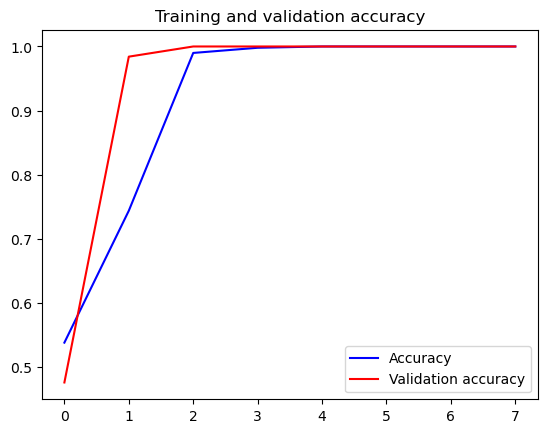

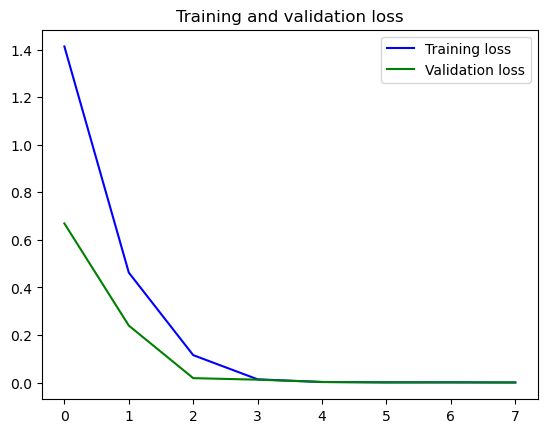

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 33856)             0         
                                                                 
 dropout (Dropout)           (None, 33856)            

In [29]:
if __name__ == '__main__':
    # Run and save your model
    my_model = binary_model()
    filepath = "binary_rgb_model.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)
    summarize_model(saved_model)